#  Project HR
predicted attrition of ur valuable employees

$IBM HR Analytics Employee Attrition & Performance$

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [90]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.pop('EmployeeCount')
df.pop('EmployeeNumber')
df.pop('Over18')
df.pop('StandardHours')

0       80
1       80
2       80
3       80
4       80
        ..
1465    80
1466    80
1467    80
1468    80
1469    80
Name: StandardHours, Length: 1470, dtype: int64

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [91]:
y=df['Attrition']
temp = df['Attrition']
X=df
X.pop('Attrition')

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [8]:
y.unique()

array(['Yes', 'No'], dtype=object)

In [9]:
from sklearn import preprocessing
le=preprocessing.LabelBinarizer()

In [10]:
y=le.fit_transform(y)

In [92]:
#temp=le.fit_transform(temp)

In [93]:
#(temp)

numpy.ndarray

In [94]:
#tmp = pd.Series(list(temp))

In [96]:
#tmp.value_counts()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[0]    1233
[1]     237
dtype: int64

In [97]:
#tmp.value_counts()/tmp.count()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[0]    0.838776
[1]    0.161224
dtype: float64

In [11]:
y.shape

(1470, 1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [13]:
df.select_dtypes(['object'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [14]:
#here we have to convert object type into continous value or integer value type
#so that no errror come in sklearn processing
ind_BusinessTravel = pd.get_dummies(df['BusinessTravel'],prefix='BusinessTravel')
ind_Department = pd.get_dummies(df['Department'],prefix='Department')
ind_EducationField =pd.get_dummies(df['EducationField'],prefix='EducationField')
ind_Gender =pd.get_dummies(df['Gender'],prefix='Gender')
ind_JobRole =pd.get_dummies(df['JobRole'],prefix='JobRole')
ind_MaritalStatus =pd.get_dummies(df['MaritalStatus'],prefix='MaritalStatus')
ind_OverTime =pd.get_dummies(df['OverTime'],prefix='OverTime')

In [15]:
pd.get_dummies?

In [16]:
ind_Gender.head()

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1


In [17]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [18]:
df1=pd.concat([ind_BusinessTravel,ind_Department,ind_EducationField,ind_Gender,
               ind_JobRole,ind_MaritalStatus,ind_OverTime,
               df.select_dtypes(['int64'])],axis=1)
#here df.select_dtypes(['int64']) concatinate with newly generated data
#with column wise

In [19]:
df1.shape #here column increases due to 

(1470, 51)

# Decision Tree

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df1,y,test_size=.52,random_state=42)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
clf = DecisionTreeClassifier(random_state=42)

In [23]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [25]:
accuracy_score(y_train,clf.predict(X_train))

1.0

In [26]:
confusion_matrix(y_train,clf.predict(X_train))

array([[578,   0],
       [  0, 127]], dtype=int64)

In [27]:
print(classification_report(y_train,clf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       578
           1       1.00      1.00      1.00       127

    accuracy                           1.00       705
   macro avg       1.00      1.00      1.00       705
weighted avg       1.00      1.00      1.00       705



In [28]:
accuracy_score(y_test,clf.predict(X_test))

0.7790849673202614

In [29]:
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       655
           1       0.28      0.34      0.30       110

    accuracy                           0.78       765
   macro avg       0.58      0.59      0.59       765
weighted avg       0.80      0.78      0.79       765



In [30]:
confusion_matrix(y_test,clf.predict(X_test))

array([[559,  96],
       [ 73,  37]], dtype=int64)

In [33]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [34]:
def print_score(clf,X_train,X_test,y_train,y_test,train=True):
    '''
    print the accuracy score,classification report ,and confusion matrix'''
    if train:
        '''
        training per formance'''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train,clf.predict(X_train))))
        print("Classifier_report:\n {} \n".format(classification_report(y_train,clf.predict(X_train))))
        print("Confusion_matrix: \n {} \n".format(confusion_matrix(y_train,clf.predict(X_train))))
        
        res=cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')
        print('Average Accuracy: \t {0:.4f}'.format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
    elif train==False:
        '''
        test performance'''
        print("Test Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test,clf.predict(X_test))))
        print("Classifier_report:\n {} \n".format(classification_report(y_test,clf.predict(X_test))))
        print("Confusion_matrix: \n {} \n".format(confusion_matrix(y_test,clf.predict(X_test))))
        
        
        

In [36]:
print_score(clf,X_train,X_test,y_train,y_test,train=True)

Train Result:

accuracy score: 1.0000

Classifier_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       578
           1       1.00      1.00      1.00       127

    accuracy                           1.00       705
   macro avg       1.00      1.00      1.00       705
weighted avg       1.00      1.00      1.00       705
 

Confusion_matrix: 
 [[578   0]
 [  0 127]] 

Average Accuracy: 	 0.7491
Accuracy SD: 		 0.0564


In [38]:
print_score(clf,X_train,X_test,y_train,y_test,train=False)

Test Result:

accuracy score: 0.7791

Classifier_report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       655
           1       0.28      0.34      0.30       110

    accuracy                           0.78       765
   macro avg       0.58      0.59      0.59       765
weighted avg       0.80      0.78      0.79       765
 

Confusion_matrix: 
 [[559  96]
 [ 73  37]] 



# Bagging

In [39]:
from sklearn.ensemble import BaggingClassifier

In [50]:
bag_clf = BaggingClassifier(base_estimator=clf,n_estimators=5000,
                            bootstrap=True,n_jobs=-1,
                           random_state=42)

In [51]:
bag_clf.fit(X_train,y_train)

C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [52]:
print_score(bag_clf,X_train,X_test,y_train,y_test,train=True)

Train Result:

accuracy score: 1.0000

Classifier_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       578
           1       1.00      1.00      1.00       127

    accuracy                           1.00       705
   macro avg       1.00      1.00      1.00       705
weighted avg       1.00      1.00      1.00       705
 

Confusion_matrix: 
 [[578   0]
 [  0 127]] 



C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

Average Accuracy: 	 0.8398
Accuracy SD: 		 0.0289


In [55]:
print_score(bag_clf,X_train,X_test,y_train,y_test,train=False)

Test Result:

accuracy score: 0.8680

Classifier_report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.93       655
           1       0.60      0.24      0.34       110

    accuracy                           0.87       765
   macro avg       0.74      0.61      0.63       765
weighted avg       0.84      0.87      0.84       765
 

Confusion_matrix: 
 [[638  17]
 [ 84  26]] 



***

# Random Forest 

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf_clf= RandomForestClassifier()

In [58]:
rf_clf.fit(X_train,y_train)

C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
print_score(rf_clf,X_train,X_test,y_train,y_test,train=True)

Train Result:

accuracy score: 1.0000

Classifier_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       578
           1       1.00      1.00      1.00       127

    accuracy                           1.00       705
   macro avg       1.00      1.00      1.00       705
weighted avg       1.00      1.00      1.00       705
 

Confusion_matrix: 
 [[578   0]
 [  0 127]] 



C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\model_selection\_validation.py:515: Dat

Average Accuracy: 	 0.8398
Accuracy SD: 		 0.0187


In [60]:
print_score(rf_clf,X_train,X_test,y_train,y_test,train=False)

Test Result:

accuracy score: 0.8680

Classifier_report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       655
           1       0.74      0.13      0.22       110

    accuracy                           0.87       765
   macro avg       0.80      0.56      0.57       765
weighted avg       0.85      0.87      0.83       765
 

Confusion_matrix: 
 [[650   5]
 [ 96  14]] 



***

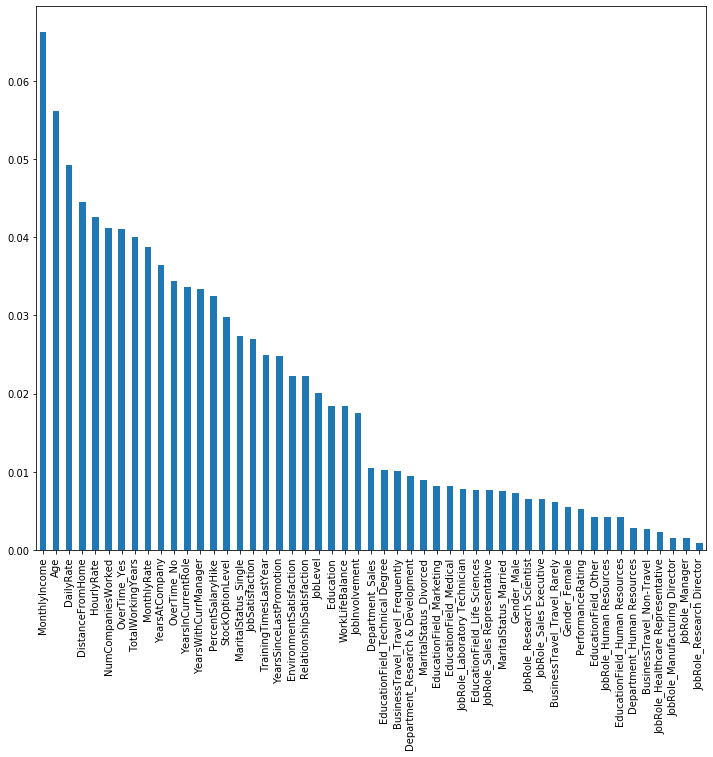

In [63]:
pd.Series(rf_clf.feature_importances_,
         index=X_train.columns).sort_values(ascending=False).plot(kind='bar',figsize=(12,10))

***

# ADAboost

In [69]:
from sklearn.ensemble import AdaBoostClassifier

In [72]:
ad_clf = AdaBoostClassifier()

In [73]:
ad_clf.fit(X_train,y_train)

C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [74]:
print_score(ad_clf,X_train,X_test,y_train,y_test,train=True)

Train Result:

accuracy score: 0.9064

Classifier_report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       578
           1       0.89      0.55      0.68       127

    accuracy                           0.91       705
   macro avg       0.90      0.77      0.81       705
weighted avg       0.90      0.91      0.90       705
 

Confusion_matrix: 
 [[569   9]
 [ 57  70]] 



C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

Average Accuracy: 	 0.8397
Accuracy SD: 		 0.0273


In [75]:
print_score(ad_clf,X_train,X_test,y_train,y_test,train=False)

Test Result:

accuracy score: 0.8719

Classifier_report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       655
           1       0.57      0.42      0.48       110

    accuracy                           0.87       765
   macro avg       0.74      0.68      0.71       765
weighted avg       0.86      0.87      0.86       765
 

Confusion_matrix: 
 [[621  34]
 [ 64  46]] 



***

# AdaBoost + RandomForest

In [77]:
ada_clf = AdaBoostClassifier(RandomForestClassifier())
ada_clf.fit(X_train,y_train)

C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [78]:
print_score(ada_clf,X_train,X_test,y_train,y_test,train=True)

Train Result:

accuracy score: 1.0000

Classifier_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       578
           1       1.00      1.00      1.00       127

    accuracy                           1.00       705
   macro avg       1.00      1.00      1.00       705
weighted avg       1.00      1.00      1.00       705
 

Confusion_matrix: 
 [[578   0]
 [  0 127]] 



C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

Average Accuracy: 	 0.8454
Accuracy SD: 		 0.0214


In [79]:
print_score(ada_clf,X_train,X_test,y_train,y_test,train=False)

Test Result:

accuracy score: 0.8693

Classifier_report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       655
           1       0.73      0.15      0.24       110

    accuracy                           0.87       765
   macro avg       0.80      0.57      0.59       765
weighted avg       0.85      0.87      0.83       765
 

Confusion_matrix: 
 [[649   6]
 [ 94  16]] 



# Gradient Boosting Classifier

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
gd_clf = GradientBoostingClassifier()

In [82]:
gd_clf.fit(X_train,y_train)

C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [83]:
print_score(gd_clf,X_train,X_test,y_train,y_test,train=True)

Train Result:

accuracy score: 0.9801

Classifier_report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       578
           1       1.00      0.89      0.94       127

    accuracy                           0.98       705
   macro avg       0.99      0.94      0.96       705
weighted avg       0.98      0.98      0.98       705
 

Confusion_matrix: 
 [[578   0]
 [ 14 113]] 



C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Average Accuracy: 	 0.8468
Accuracy SD: 		 0.0227


In [84]:
print_score(gd_clf,X_train,X_test,y_train,y_test,train=False)

Test Result:

accuracy score: 0.8667

Classifier_report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.93       655
           1       0.57      0.30      0.39       110

    accuracy                           0.87       765
   macro avg       0.73      0.63      0.66       765
weighted avg       0.84      0.87      0.85       765
 

Confusion_matrix: 
 [[630  25]
 [ 77  33]] 



# XGBBoosting

In [85]:
import xgboost as xgb

In [86]:
xg_clf = xgb.XGBClassifier()

In [87]:
xg_clf.fit(X_train,y_train)

C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [88]:
print_score(xg_clf,X_train,X_test,y_train,y_test,train=True)
print_score(xg_clf,X_train,X_test,y_train,y_test,train=False)

Train Result:

accuracy score: 1.0000

Classifier_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       578
           1       1.00      1.00      1.00       127

    accuracy                           1.00       705
   macro avg       1.00      1.00      1.00       705
weighted avg       1.00      1.00      1.00       705
 

Confusion_matrix: 
 [[578   0]
 [  0 127]] 



C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Average Accuracy: 	 0.8340
Accuracy SD: 		 0.0332
Test Result:

accuracy score: 0.8614

Classifier_report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       655
           1       0.53      0.31      0.39       110

    accuracy                           0.86       765
   macro avg       0.71      0.63      0.66       765
weighted avg       0.84      0.86      0.85       765
 

Confusion_matrix: 
 [[625  30]
 [ 76  34]] 

